In [1]:
import numpy as np

In [7]:
def perceptron(w, x):
    return np.sign(w[0]+ np.dot(w[1:], x))

In [9]:
def solve_for_w(X, y):
    ni, nf = X.shape
    w=np.zeros(nf+1)
    max_iter = 2
    lr = 1
    for it in range(max_iter):
        print("\nIteration", it)
        print("Weights", w)
        for obj in range(ni):
            print("Object %s, label: %d" %(X[obj], y[obj]))
            p = perceptron(w, X[obj])
            print("Prediction", p)
            if p == y[obj]:
                print("Prediction is correct")
            else:
                print("*Prediction is incorrect*")
                delta_weights = np.append(lr*y[obj], lr*X[obj]*y[obj]) 
                print("Delta", delta_weights)                
                w += delta_weights
                print("New weights", w)

In [10]:
np.append(1, np.array([2, 3]))

array([1, 2, 3])

In [12]:
# AND
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = [-1, -1, -1, 1]

In [13]:
solve_for_w(X, y)


Iteration 0
Weights [0. 0. 0.]
Object [-1 -1], label: -1
Prediction 0.0
*Prediction is incorrect*
Delta [-1  1  1]
New weights [-1.  1.  1.]
Object [-1  1], label: -1
Prediction -1.0
Prediction is correct
Object [ 1 -1], label: -1
Prediction -1.0
Prediction is correct
Object [1 1], label: 1
Prediction 1.0
Prediction is correct

Iteration 1
Weights [-1.  1.  1.]
Object [-1 -1], label: -1
Prediction -1.0
Prediction is correct
Object [-1  1], label: -1
Prediction -1.0
Prediction is correct
Object [ 1 -1], label: -1
Prediction -1.0
Prediction is correct
Object [1 1], label: 1
Prediction 1.0
Prediction is correct


In [14]:
# OR
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = [-1, 1, 1, 1]

In [15]:
solve_for_w(X, y)


Iteration 0
Weights [0. 0. 0.]
Object [-1 -1], label: -1
Prediction 0.0
*Prediction is incorrect*
Delta [-1  1  1]
New weights [-1.  1.  1.]
Object [-1  1], label: 1
Prediction -1.0
*Prediction is incorrect*
Delta [ 1 -1  1]
New weights [0. 0. 2.]
Object [ 1 -1], label: 1
Prediction -1.0
*Prediction is incorrect*
Delta [ 1  1 -1]
New weights [1. 1. 1.]
Object [1 1], label: 1
Prediction 1.0
Prediction is correct

Iteration 1
Weights [1. 1. 1.]
Object [-1 -1], label: -1
Prediction -1.0
Prediction is correct
Object [-1  1], label: 1
Prediction 1.0
Prediction is correct
Object [ 1 -1], label: 1
Prediction 1.0
Prediction is correct
Object [1 1], label: 1
Prediction 1.0
Prediction is correct


In [16]:
# XOR
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = [1, -1, -1, 1]

In [17]:
solve_for_w(X, y)


Iteration 0
Weights [0. 0. 0.]
Object [-1 -1], label: 1
Prediction 0.0
*Prediction is incorrect*
Delta [ 1 -1 -1]
New weights [ 1. -1. -1.]
Object [-1  1], label: -1
Prediction 1.0
*Prediction is incorrect*
Delta [-1  1 -1]
New weights [ 0.  0. -2.]
Object [ 1 -1], label: -1
Prediction 1.0
*Prediction is incorrect*
Delta [-1 -1  1]
New weights [-1. -1. -1.]
Object [1 1], label: 1
Prediction -1.0
*Prediction is incorrect*
Delta [1 1 1]
New weights [0. 0. 0.]

Iteration 1
Weights [0. 0. 0.]
Object [-1 -1], label: 1
Prediction 0.0
*Prediction is incorrect*
Delta [ 1 -1 -1]
New weights [ 1. -1. -1.]
Object [-1  1], label: -1
Prediction 1.0
*Prediction is incorrect*
Delta [-1  1 -1]
New weights [ 0.  0. -2.]
Object [ 1 -1], label: -1
Prediction 1.0
*Prediction is incorrect*
Delta [-1 -1  1]
New weights [-1. -1. -1.]
Object [1 1], label: 1
Prediction -1.0
*Prediction is incorrect*
Delta [1 1 1]
New weights [0. 0. 0.]


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [20]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [21]:
nx = ny = 200
x_min = y_min = -1.3
x_max = y_max = 1.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

In [22]:
D=np.c_[xx.ravel(), yy.ravel()]

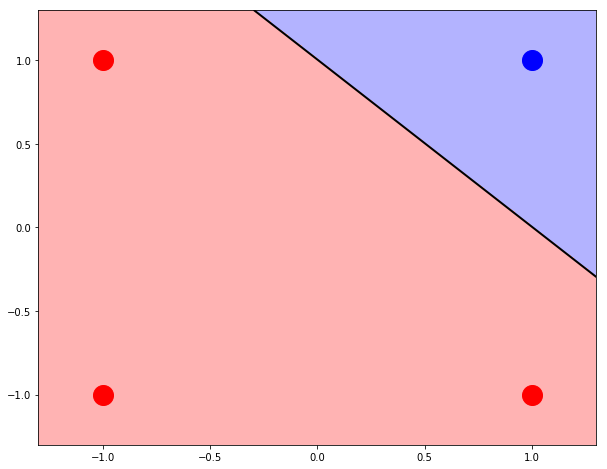

In [75]:
#AND
plt.plot([-1], [-1], 'o', color='red', markersize=20)
plt.plot([-1], [1], 'o', color='red', markersize=20)
plt.plot([1], [-1], 'o', color='red', markersize=20)
plt.plot([1], [1], 'o', color='blue', markersize=20)
w=[-1, 1, 1]
p=np.array([perceptron(w, d) for d in D])
p=p.reshape(xx.shape)
plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

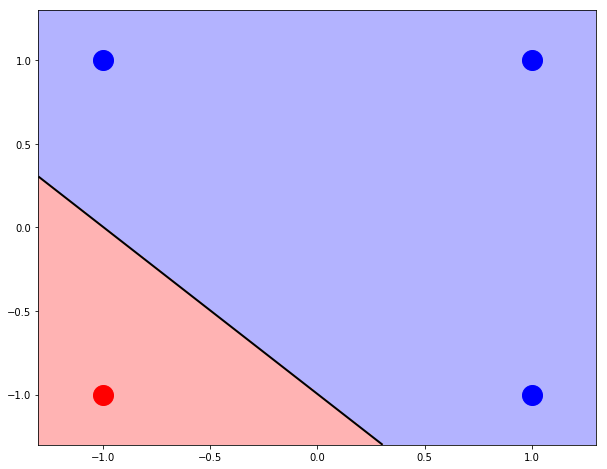

In [76]:
#OR
plt.plot([-1], [-1], 'o', color='red', markersize=20)
plt.plot([-1], [1], 'o', color='blue', markersize=20)
plt.plot([1], [-1], 'o', color='blue', markersize=20)
plt.plot([1], [1], 'o', color='blue', markersize=20)
w=[1, 1, 1]
p=np.array([perceptron(w, d) for d in D])
p=p.reshape(xx.shape)
plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')

In [77]:
def xor(x):
    and_weights = [-1, 1, 1]
    or_weights = [1, 1, 1]
    #xor = (a and not b) or (not a and b)
    # z1 = (a and not b)
    aAndNotb=np.copy(and_weights)
    aAndNotb[2] = -1*aAndNotb[2]
    notaAndb=np.copy(and_weights)
    notaAndb[1] = -1*aAndNotb[1]
    z1 = np.sign(aAndNotb[0]+np.dot(aAndNotb[1:], x))
    z2 = np.sign(notaAndb[0]+np.dot(notaAndb[1:], x))
    return np.sign(or_weights[0]+or_weights[1]*z1 + or_weights[2]*z2)

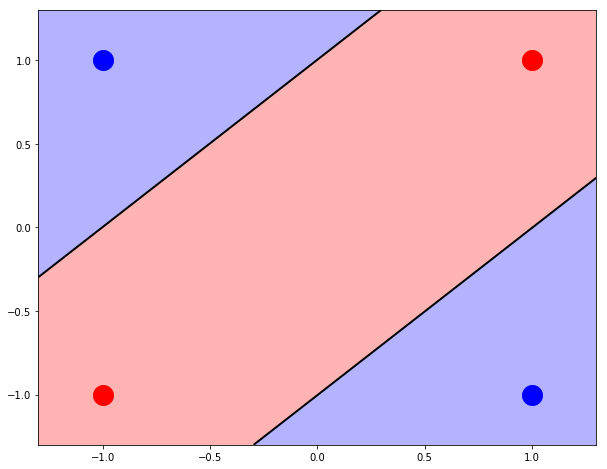

In [78]:
#XOR
plt.plot([-1], [-1], 'o', color='red', markersize=20)
plt.plot([-1], [1], 'o', color='blue', markersize=20)
plt.plot([1], [-1], 'o', color='blue', markersize=20)
plt.plot([1], [1], 'o', color='red', markersize=20)
w=[1, 1, 1]
p=np.array([xor(d) for d in D])
p=p.reshape(xx.shape)
plt.pcolormesh(xx, yy, p, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, p, [0.5], linewidths=2., colors='k')